# **Proyecto 2 - Entrega 1: Modelos de Regresi√≥n Lineal**  

## üë• **Integrantes:**  
- **Diederich Solis** (22952)  
- **Gabriel Paz** (221087)  

---

##  **INSTRUCCIONES**  
Utilice el data set House Prices: Advanced Regression Techniques. Debe hacer un an√°lisis exploratorio para entender mejor los datos, sabiendo que el objetivo final es predecir los precios de las casas. Recuerde explicar bien cada uno de los hallazgos que haga. La forma m√°s organizada de hacer un an√°lisis exploratorio es generando ciertas preguntas de las l√≠neas que le parece interesante investigar. Genere un informe con las explicaciones de los
pasos que llev√≥ a cabo y los resultados obtenidos. Recuerde que la investigaci√≥n debe ser reproducible por lo que debe guardar el c√≥digo que ha utilizado para resolver los ejercicios.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('train.csv')

df.head()


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

Ahora observaremos la data con la que contamos:

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Revisi√≥n Inicial de Datos

- **Dimensiones del dataset:**  
  El conjunto de datos consta de 1460 registros y 81 columnas, lo que nos permite trabajar con una cantidad moderada de observaciones y m√∫ltiples atributos para analizar.

- **Tipos de variables:**  
  Se observa una mezcla de variables num√©ricas y categ√≥ricas. Esto indica que el dataset incluye datos cuantitativos (como √°reas, precios y medidas) y cualitativos (como vecindarios, tipos de calle y materiales de construcci√≥n).

- **Presencia de valores nulos:**  
  Algunas columnas presentan valores faltantes, lo cual es com√∫n en datasets reales. En particular, variables como `PoolQC`, `MiscFeature` y `Alley` tienen un alto porcentaje de datos ausentes. Es necesario identificar la causa de estas ausencias y decidir si se imputan o se eliminan estas columnas, seg√∫n su relevancia en el modelo.

- **Variables categ√≥ricas:**  
  Las columnas de tipo categ√≥rico representan atributos descriptivos importantes, tales como el vecindario, el tipo de calle, y los materiales de construcci√≥n. Estos atributos pueden ser fundamentales para capturar diferencias en la calidad y el valor de las propiedades, por lo que su correcta codificaci√≥n e interpretaci√≥n es esencial para construir modelos de regresi√≥n robustos.


In [3]:
df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

##  **An√°lisis Descriptivo de los Datos**  

El an√°lisis descriptivo nos permite explorar las distribuciones y caracter√≠sticas de las variables num√©ricas clave en el dataset.  

###  **Distribuci√≥n de Variables Num√©ricas**  
Algunas variables presentan una amplia dispersi√≥n en sus valores, lo que indica una gran variabilidad en las caracter√≠sticas de las propiedades:  

- ** Tama√±o del lote (`LotArea`)**:  
  - Representa el √°rea total del terreno de cada vivienda.  
  - Tiene un amplio rango de valores, lo que sugiere que las propiedades var√≠an significativamente en tama√±o.  

- ** √Årea habitable sobre nivel del suelo (`GrLivArea`)**:  
  - Indica el espacio habitable de la casa (excluyendo s√≥tanos).  
  - Presenta una distribuci√≥n sesgada hacia la derecha, con algunas viviendas mucho m√°s grandes que el promedio.  

- ** Precio de venta (`SalePrice`)**:  
  - **Valor m√≠nimo:** 34,900  
  - **Valor m√°ximo:** 755,000  
  - **Distribuci√≥n:** Asim√©trica, con la mayor√≠a de los precios concentrados en rangos m√°s bajos y algunas propiedades muy costosas actuando como valores at√≠picos.  

###  **Variables con Valores Mayoritariamente Cero**  
Algunas variables contienen valores de **cero en la mayor√≠a de los registros**, lo que indica que la caracter√≠stica correspondiente es poco com√∫n en el dataset:  

- ** `PoolArea` (√Årea de piscina):**  
  - La mayor√≠a de las viviendas no tienen piscina, lo que sugiere que esta variable tiene poco impacto en la predicci√≥n de precios.  

Este an√°lisis nos permite identificar posibles **valores at√≠picos**, entender la distribuci√≥n de las variables y evaluar cu√°les podr√≠an requerir transformaciones para mejorar el rendimiento de los modelos de regresi√≥n.  



In [4]:
df.isnull().sum().sort_values(ascending=False)

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
MasVnrType      872
               ... 
ExterQual         0
Exterior2nd       0
Exterior1st       0
RoofMatl          0
SalePrice         0
Length: 81, dtype: int64

## An√°lisis de Valores Nulos  

Uno de los pasos fundamentales en la limpieza de datos es identificar y manejar los valores nulos, ya que pueden afectar la precisi√≥n y el rendimiento de los modelos de regresi√≥n.  

### Variables con Alto Porcentaje de Valores Nulos  
Algunas columnas contienen m√°s del 50% de valores faltantes, lo que indica que tienen muy poca informaci√≥n relevante. Entre ellas se encuentran:  

- **PoolQC (Calidad de la piscina)**  
  - M√°s del 99% de los valores est√°n ausentes.  
  - La mayor√≠a de las viviendas no tienen piscina, por lo que esta variable aporta poco a la predicci√≥n del precio.  

- **MiscFeature (Caracter√≠sticas miscel√°neas como cobertizos o ascensores)**  
  - M√°s del 96% de los valores son nulos.  
  - Representa caracter√≠sticas poco comunes que probablemente no tengan un gran impacto en el precio de la vivienda.  

- **Alley (Tipo de acceso trasero o callej√≥n)**  
  - M√°s del 93% de los valores est√°n ausentes.  
  - Muchas viviendas no tienen acceso trasero a un callej√≥n, lo que explica la alta cantidad de valores nulos.  

### Variables Num√©ricas con Algunos Valores Nulos  
Existen algunas variables num√©ricas importantes con valores faltantes que deben ser tratados adecuadamente:  

- **MasVnrArea (√Årea de revestimiento de mamposter√≠a)**  
  - Algunos valores nulos indican que la vivienda no tiene revestimiento de mamposter√≠a.  
  - Se puede imputar con cero en estos casos.  

- **GarageYrBlt (A√±o de construcci√≥n del garaje)**  
  - Algunas casas no tienen garaje, lo que explica los valores faltantes.  
  - Se puede reemplazar con "0" o con el a√±o de construcci√≥n de la vivienda.  


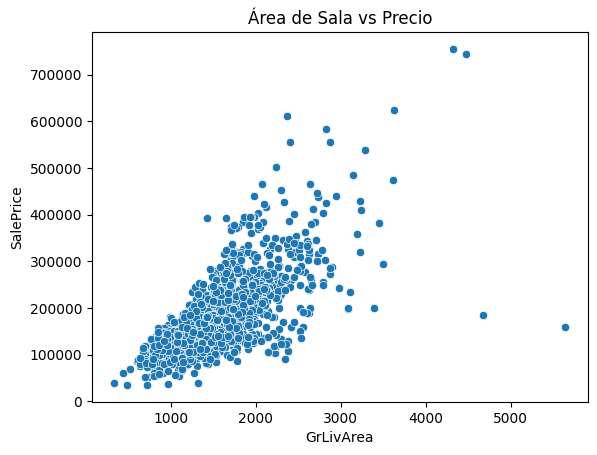

In [5]:
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df)
plt.title('√Årea de Sala vs Precio')
plt.show()

## Relaci√≥n entre √Årea Habitable y Precio (GrLivArea vs SalePrice)  

Se observa una relaci√≥n positiva entre el √°rea habitable (`GrLivArea`) y el precio de venta (`SalePrice`): a mayor √°rea, mayor precio.  

Sin embargo, existen algunos valores at√≠picos, principalmente casas muy grandes con precios anormalmente bajos. Estos outliers pueden afectar el rendimiento del modelo, por lo que se recomienda analizarlos y considerar su eliminaci√≥n.  


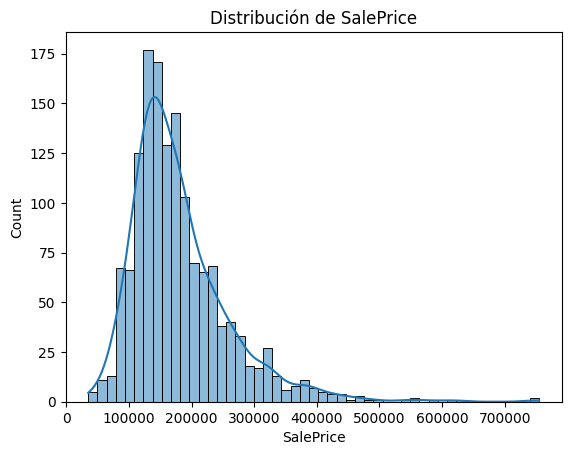

In [6]:
sns.histplot(df['SalePrice'], kde=True)
plt.title('Distribuci√≥n de SalePrice')
plt.show()

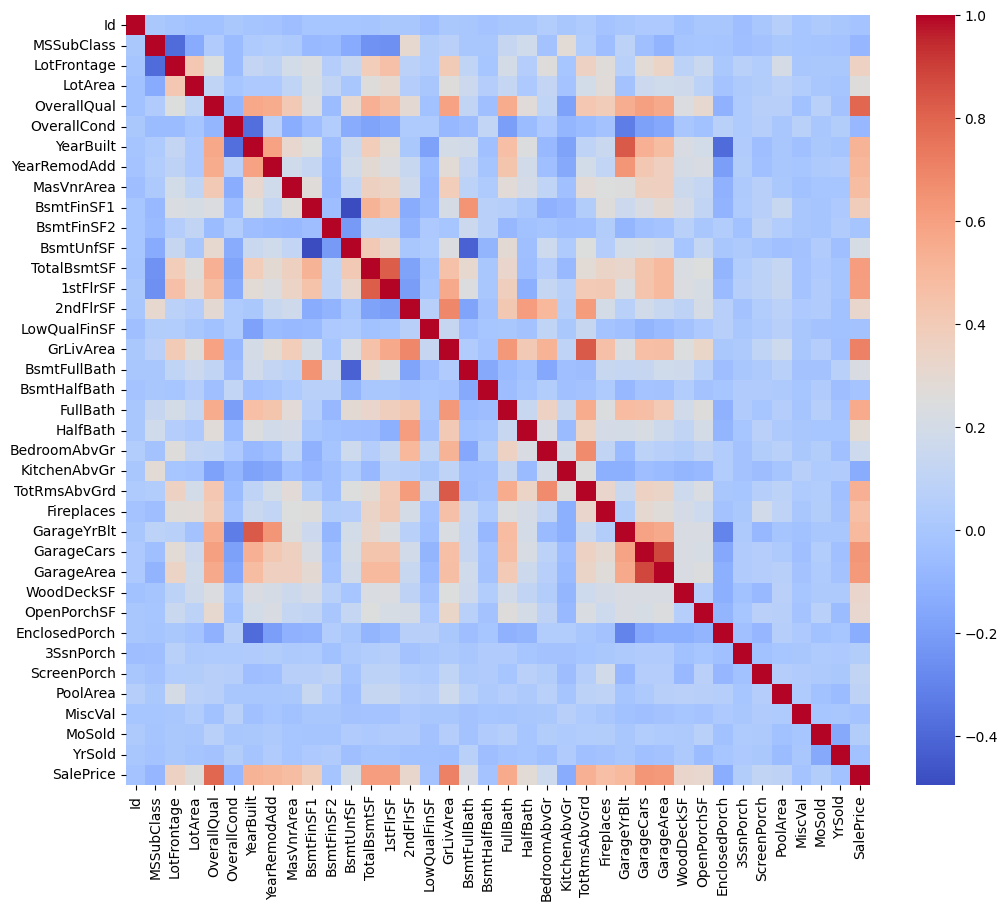

In [7]:

df_numeric = df.select_dtypes(include=['int64', 'float64'])

corr_matrix = df_numeric.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.show()


## Matriz de Correlaci√≥n  

Las variables con mayor correlaci√≥n con el precio de venta (`SalePrice`) son:  
- **OverallQual** (calidad general de la vivienda)  
- **GrLivArea** (√°rea habitable sobre el nivel del suelo)  
- **GarageCars** (cantidad de autos que caben en el garaje)  

Por otro lado, variables como `PoolArea`, `MiscVal` y `3SsnPorch` tienen una correlaci√≥n cercana a cero, lo que indica que no son relevantes para predecir el precio.  

Este an√°lisis es clave para la selecci√≥n de variables, permitiendo enfocarse en aquellas que realmente impactan en el modelo de regresi√≥n.  


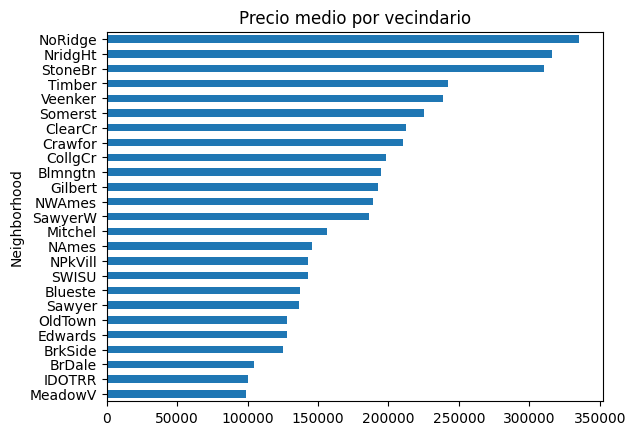

In [8]:
df.groupby('Neighborhood')['SalePrice'].mean().sort_values().plot(kind='barh')
plt.title('Precio medio por vecindario')
plt.show()

## Precio Promedio por Vecindario  

Existe una clara diferencia de precios seg√∫n la ubicaci√≥n de la vivienda.  

- **Vecindarios con precios m√°s altos:** `NoRidge`, `StoneBr`  
- **Vecindarios m√°s econ√≥micos:** `MeadowV`  

Esto confirma que `Neighborhood` es una variable clave en la predicci√≥n del precio de venta. En el preprocesamiento, se recomienda convertir esta variable en **dummies** para su uso en el modelo de regresi√≥n.  


c:\Users\DELL I7\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


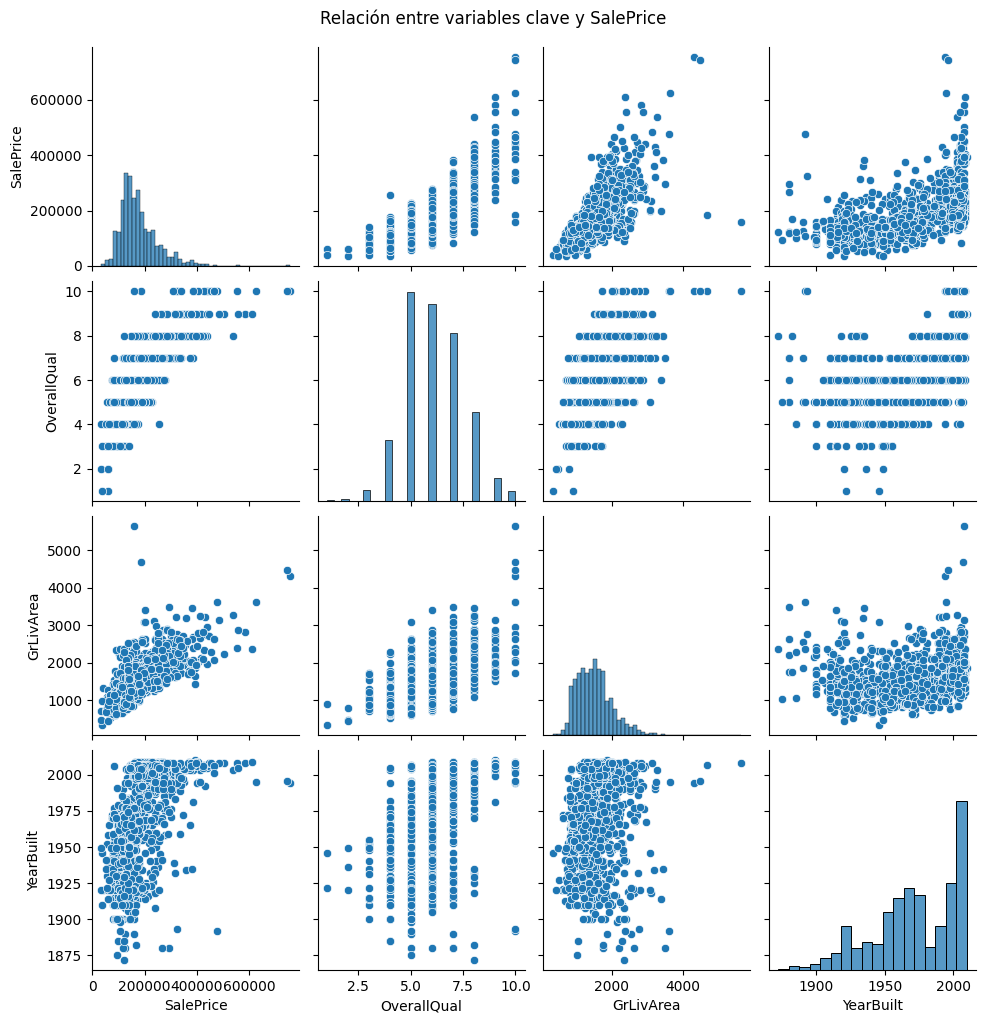

In [9]:
sns.pairplot(df, vars=['SalePrice', 'OverallQual', 'GrLivArea', 'YearBuilt'])
plt.suptitle('Relaci√≥n entre variables clave y SalePrice', y=1.02)
plt.show()


## Pairplot: Relaci√≥n entre Variables Clave y SalePrice  

Se observa una relaci√≥n positiva entre `SalePrice` y las siguientes variables:  

- **OverallQual:** A mayor calidad general de la vivienda, mayor es el precio.  
- **GrLivArea:** Casas con mayor √°rea habitable tienden a tener precios m√°s altos.  
- **YearBuilt:** Las casas m√°s nuevas suelen ser m√°s costosas.  

Adem√°s, hay algunos outliers, especialmente viviendas muy grandes con precios anormalmente bajos, que podr√≠an afectar el modelo y deben ser analizados.  


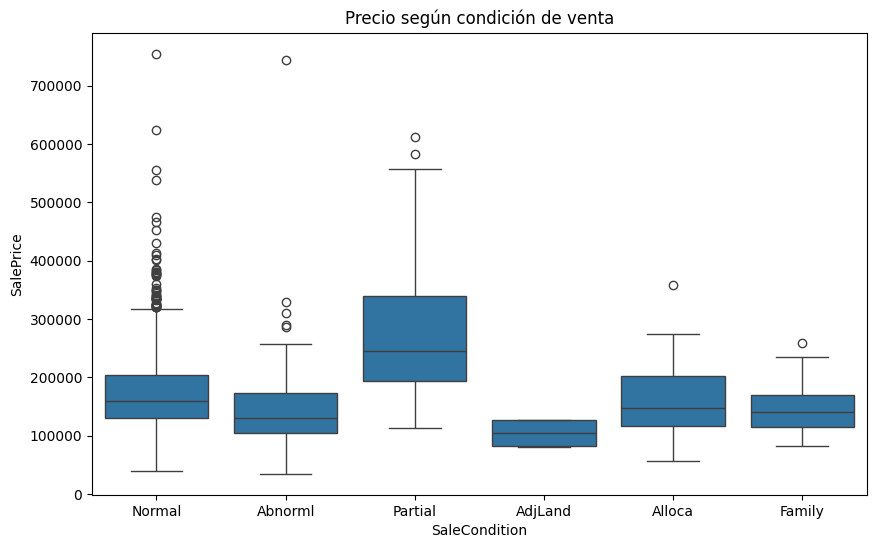

In [10]:
plt.figure(figsize=(10,6))
sns.boxplot(x='SaleCondition', y='SalePrice', data=df)
plt.title('Precio seg√∫n condici√≥n de venta')
plt.show()

## Boxplot: Precio seg√∫n Condici√≥n de Venta  

El an√°lisis muestra diferencias en la distribuci√≥n de precios seg√∫n la condici√≥n de venta (`SaleCondition`):  

- **Normal:** Presenta una distribuci√≥n de precios m√°s estable y amplia.  
- **Partial:** Tiende a tener precios m√°s altos, posiblemente porque corresponde a casas nuevas o remodeladas.  
- **Abnorml:** Generalmente muestra precios m√°s bajos, lo que podr√≠a estar relacionado con ventas forzadas o condiciones especiales.  

Se identifican varios outliers en cada categor√≠a, especialmente en `Normal` y `Partial`, lo que sugiere la necesidad de revisar su impacto en el modelo.  


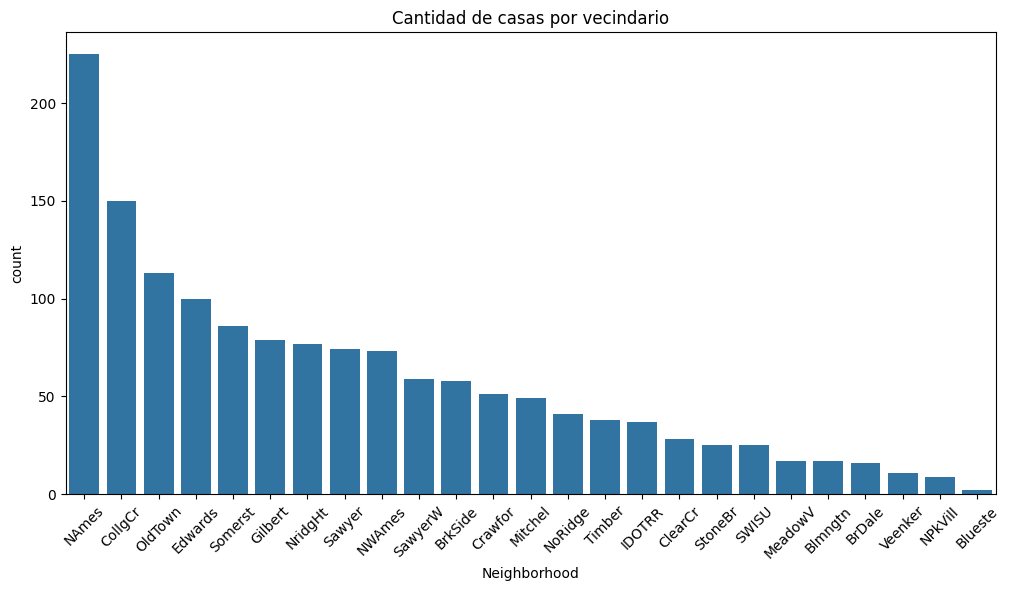

In [11]:
plt.figure(figsize=(12,6))
sns.countplot(x='Neighborhood', data=df, order=df['Neighborhood'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Cantidad de casas por vecindario')
plt.show()


## Countplot: Cantidad de Casas por Vecindario  

El n√∫mero de viviendas var√≠a significativamente entre vecindarios:  

- **NAmes** es el vecindario con m√°s casas registradas, seguido por **CollgCr** y **OldTown**.  
- **MeadowV** y **Blueste** tienen muy pocas viviendas en el dataset.  

Esto sugiere que algunos vecindarios aportan mucha m√°s informaci√≥n al modelo que otros. En el preprocesamiento, se debe evaluar si los vecindarios con pocas casas son relevantes o si es conveniente agruparlos o eliminarlos para mejorar la estabilidad del modelo.  


# **Conclusiones Finales - Primera Entrega (Avances)**  

En esta primera fase, se realiz√≥ un an√°lisis exploratorio detallado del dataset inmobiliario proporcionado por Kaggle, identificando patrones clave y aspectos cr√≠ticos que influir√°n en la construcci√≥n del modelo de regresi√≥n lineal. A continuaci√≥n, se presentan los hallazgos m√°s relevantes:  

###  **Estructura y Calidad de los Datos**  
- El dataset cuenta con **1,460 registros y 81 columnas**, proporcionando una base de datos amplia y detallada.  
- Se identificaron variables con un alto porcentaje de valores nulos, como `PoolQC`, `MiscFeature` y `Alley`, que deber√°n ser analizadas para determinar si se eliminan o si se imputan.  

###  **Distribuci√≥n del Precio de Venta (`SalePrice`)**  
- Presenta una **distribuci√≥n sesgada positivamente**, con una larga cola hacia precios altos.  
- Esto sugiere que podr√≠a ser beneficioso aplicar una **transformaci√≥n logar√≠tmica** para mejorar la linealidad y el rendimiento del modelo.  

###  **Variables M√°s Relevantes para el Modelo**  
- Se identific√≥ que **OverallQual, GrLivArea y GarageCars** tienen la mayor correlaci√≥n con el precio de venta.  
- Esto indica que la **calidad de construcci√≥n, el √°rea habitable y la capacidad del garaje** son factores clave para estimar el valor de una vivienda.  

###  **Impacto del Vecindario en los Precios**  
- Existen diferencias significativas en los precios seg√∫n la ubicaci√≥n.  
- Vecindarios como **NoRidge y StoneBr** presentan precios notablemente m√°s altos, mientras que **MeadowV** es una de las zonas m√°s econ√≥micas.  
- Esto confirma que la **ubicaci√≥n geogr√°fica es una variable esencial** en la predicci√≥n del precio de las viviendas.  

###  **Condici√≥n de Venta y su Relaci√≥n con el Precio**  
- La mayor√≠a de las ventas corresponden a la condici√≥n **Normal**, con una amplia dispersi√≥n de precios.  
- Las ventas **Partial** (posiblemente casas nuevas o remodeladas) tienden a tener precios m√°s altos.  
- Las ventas con condici√≥n **Abnorml** generalmente presentan precios m√°s bajos, lo que puede estar relacionado con ventas forzadas o condiciones especiales.  

###  **Presencia de Outliers**  
- Se detectaron valores at√≠picos, principalmente **casas con √°reas habitables excepcionalmente grandes y precios anormalmente bajos**.  
- Estos outliers deber√°n ser analizados y tratados cuidadosamente, ya que pueden distorsionar el modelo de regresi√≥n.  

###  **Recomendaciones para el Preprocesamiento**  
Para garantizar un modelo preciso y robusto, ser√° necesario aplicar un **preprocesamiento adecuado**, que incluya:  
‚úî **Manejo de valores nulos** mediante imputaci√≥n o eliminaci√≥n.  
‚úî **Transformaciones de variables** para mejorar la distribuci√≥n y la linealidad.  
‚úî **Codificaci√≥n de variables categ√≥ricas**, especialmente `Neighborhood` y `SaleCondition`.  
‚úî **Tratamiento de outliers** para evitar sesgos en el modelo.  


## üìä **Distribuci√≥n de la Variable Objetivo (`SalePrice`)**  
El siguiente an√°lisis explora la distribuci√≥n de los precios de las casas (`SalePrice`) en el conjunto de datos, permiti√©ndonos identificar tendencias, sesgos y valores at√≠picos.

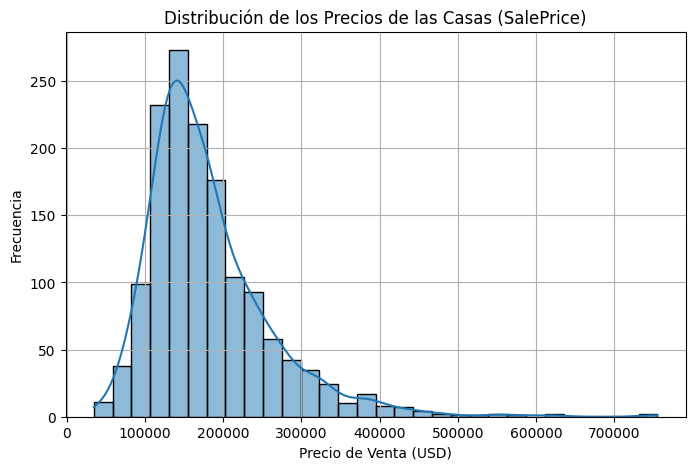

In [12]:
plt.figure(figsize=(8, 5))
sns.histplot(df["SalePrice"], kde=True, bins=30)
plt.title("Distribuci√≥n de los Precios de las Casas (SalePrice)")
plt.xlabel("Precio de Venta (USD)")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()


### **Descripci√≥n del An√°lisis**  
La gr√°fica presentada es un histograma de `SalePrice`, donde:  
- El eje **X** representa los precios de las viviendas en d√≥lares (USD).  
- El eje **Y** muestra la frecuencia de aparici√≥n de cada rango de precios.  
- Se ha agregado una **curva de densidad (KDE)** para visualizar la forma de la distribuci√≥n de los datos.  

### **Interpretaci√≥n**  
- **Asimetr√≠a Positiva (Sesgo a la derecha):**  
  La distribuci√≥n de los precios de las casas no es sim√©trica; presenta una clara inclinaci√≥n hacia la derecha, lo que indica que existen algunas viviendas con precios significativamente m√°s altos en comparaci√≥n con la mayor√≠a de los datos.
  
- **Moda y Concentraci√≥n:**  
  Se observa que la mayor√≠a de los precios de las viviendas est√°n concentrados en el rango de **100,000 a 200,000 USD**, lo que sugiere que este es el precio t√≠pico de una vivienda en este conjunto de datos.

- **Presencia de Valores At√≠picos:**  
  Aunque la mayor√≠a de los precios se encuentran en un rango moderado, existen algunas viviendas con precios superiores a **500,000 USD**, lo que sugiere la presencia de **outliers** (valores at√≠picos). Estos valores pueden influir en el modelo de regresi√≥n y ser√° importante considerar t√©cnicas de transformaci√≥n o normalizaci√≥n para mejorar el ajuste del modelo.


## üîó **Correlaci√≥n entre Variables**  
Analizamos la relaci√≥n entre las diferentes variables del conjunto de datos para determinar cu√°les podr√≠an ser mejores predictores del precio de una casa (`SalePrice`).

### **Descripci√≥n del An√°lisis**  
Para este an√°lisis, se calcularon las correlaciones entre todas las variables num√©ricas del dataset y se gener√≥ un **mapa de calor** que permite visualizar la magnitud de estas relaciones.

- Se utiliz√≥ la **matriz de correlaci√≥n** de Pearson para evaluar la relaci√≥n entre las variables.
- Se seleccionaron las **10 variables m√°s correlacionadas** con `SalePrice`, que son las que podr√≠an tener mayor impacto en la predicci√≥n.


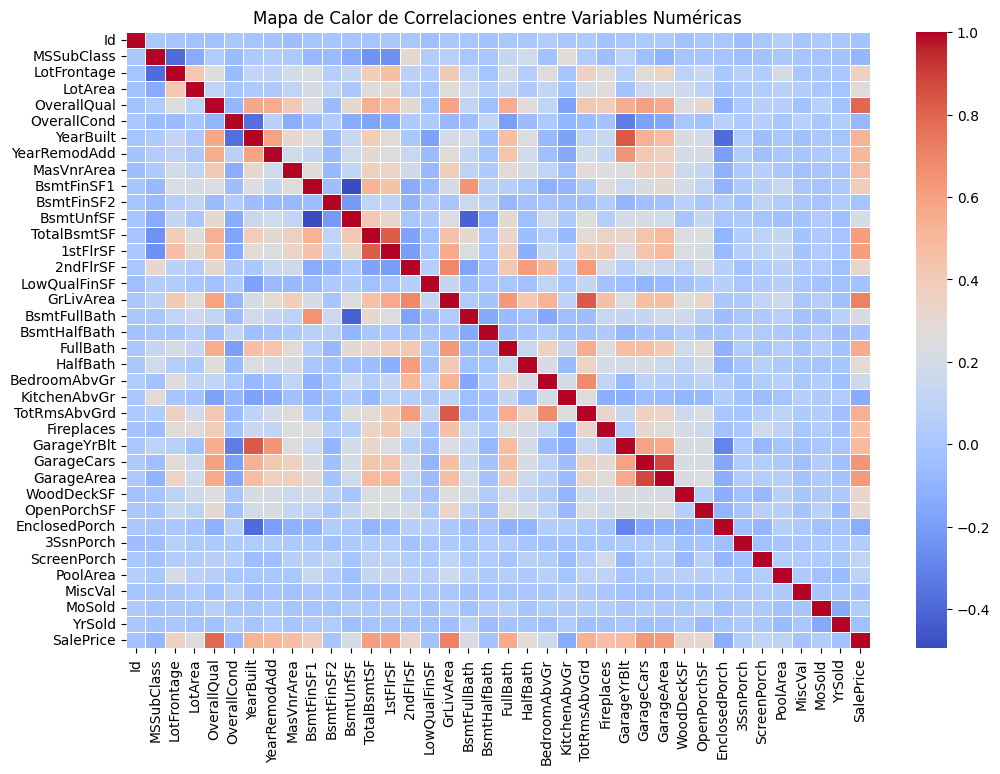

OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64


In [14]:
# Filtrar solo las columnas num√©ricas antes de calcular la correlaci√≥n
df_numeric = df.select_dtypes(include=[np.number])

# Calcular la matriz de correlaci√≥n con solo valores num√©ricos
correlation_matrix = df_numeric.corr()

# Visualizar el mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False, linewidths=0.5)
plt.title("Mapa de Calor de Correlaciones entre Variables Num√©ricas")
plt.show()

# Seleccionar las 10 variables m√°s correlacionadas con 'SalePrice'
top_corr = correlation_matrix["SalePrice"].abs().sort_values(ascending=False)[1:11]
print(top_corr)




### **Interpretaci√≥n del Mapa de Calor**  
El mapa de calor muestra las correlaciones entre las variables, donde:  
- **Los valores cercanos a 1 (rojo oscuro)** indican una fuerte correlaci√≥n positiva (cuando una variable aumenta, la otra tambi√©n lo hace).  
- **Los valores cercanos a -1 (azul oscuro)** indican una fuerte correlaci√≥n negativa (cuando una variable aumenta, la otra disminuye).  
- **Los valores cercanos a 0** indican que no hay una relaci√≥n lineal significativa entre las variables.

Podemos observar que la variable `SalePrice` tiene una fuerte correlaci√≥n con ciertas variables clave.

### **Variables M√°s Correlacionadas con `SalePrice`**  
Seg√∫n los resultados num√©ricos de la matriz de correlaci√≥n, las 10 variables con mayor impacto en el precio de la casa son:



## üèò **An√°lisis de Agrupamientos**  
En este an√°lisis, agrupamos los datos por vecindario para evaluar la influencia de la ubicaci√≥n en el precio de las viviendas.


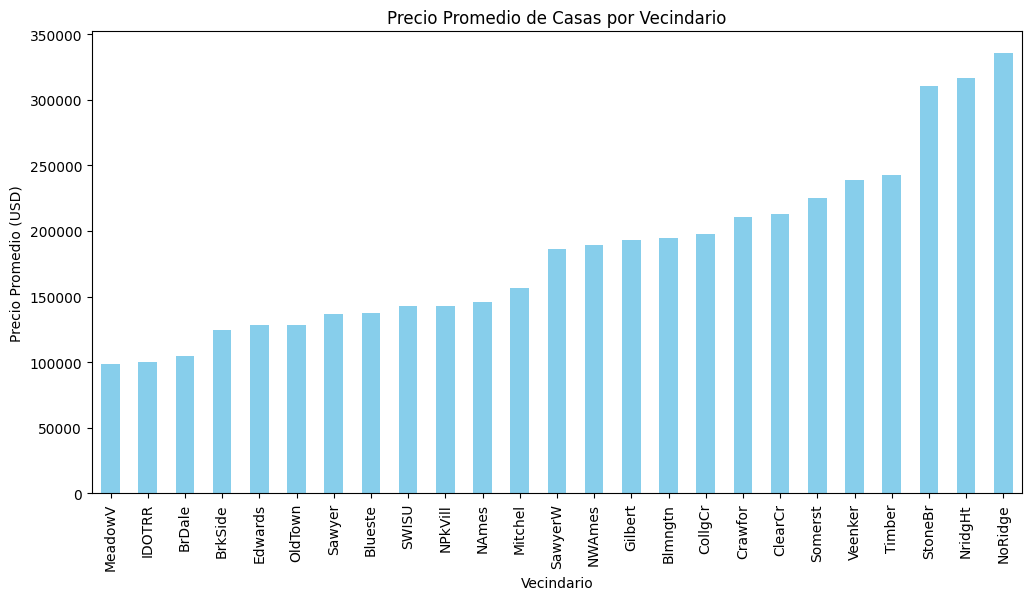

In [15]:
plt.figure(figsize=(12, 6))
df.groupby("Neighborhood")["SalePrice"].mean().sort_values().plot(kind="bar", color="skyblue")
plt.title("Precio Promedio de Casas por Vecindario")
plt.xlabel("Vecindario")
plt.ylabel("Precio Promedio (USD)")
plt.xticks(rotation=90)
plt.show()


### **Interpretaci√≥n de la Gr√°fica**  
- **Variabilidad en los precios por vecindario:**  
  Se observa que el precio promedio de las viviendas var√≠a significativamente seg√∫n la ubicaci√≥n.  
  - Los vecindarios con **menores precios promedio** se encuentran en el rango de **100,000 a 150,000 USD**.
  - Los vecindarios con **mayores precios promedio** superan los **300,000 USD**.

- **Vecindarios con precios bajos:**  
  - Entre los vecindarios m√°s econ√≥micos se encuentran `MeadowV`, `IDOTRR`, `BrDale` y `BrkSide`, con precios promedio por debajo de los **150,000 USD**.
  - Esto puede deberse a factores como **menor calidad de construcci√≥n, ubicaci√≥n menos demandada o menor acceso a servicios**.

- **Vecindarios con precios altos:**  
  - Los vecindarios como `StoneBr`, `NridgHt` y `NoRidge` presentan precios promedio por encima de los **300,000 USD**.
  - Estas √°reas podr√≠an estar asociadas con **mejor infraestructura, mayor calidad de viviendas y ubicaci√≥n m√°s privilegiada**.


Este an√°lisis sugiere que incluir la variable **`Neighborhood`** como predictor en el modelo podr√≠a mejorar la precisi√≥n en la estimaci√≥n de precios.


## üìà **Regresi√≥n Lineal**  
### üîπ **Modelo Univariado**  
Se elige la variable m√°s correlacionada con `SalePrice` y se ajusta un modelo de regresi√≥n lineal simple para predecir el precio de las viviendas.

### **Descripci√≥n del Modelo**  
- Se seleccion√≥ la variable predictora con la **mayor correlaci√≥n con `SalePrice`**, que en este caso es `OverallQual`.
- Se dividi√≥ el conjunto de datos en **80% entrenamiento y 20% prueba**.
- Se ajust√≥ un modelo de **regresi√≥n lineal univariado** (`LinearRegression` de `sklearn`).
- Se evalu√≥ el modelo con m√©tricas de error y precisi√≥n.


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Filtrar solo columnas num√©ricas
df_numeric = df.select_dtypes(include=[np.number])

# Definir X (variables predictoras) y y (variable objetivo)
X = df_numeric.drop("SalePrice", axis=1)  # Eliminamos la variable objetivo de las caracter√≠sticas
y = df_numeric["SalePrice"]  # Definimos la variable objetivo

# Dividir los datos en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Asegurar que tenemos las variables m√°s correlacionadas
top_corr = df_numeric.corr()["SalePrice"].abs().sort_values(ascending=False)[1:11]

# Selecci√≥n de la variable m√°s correlacionada
best_feature = top_corr.index[0]
X_train_uni = X_train[[best_feature]]
X_test_uni = X_test[[best_feature]]

# Modelo de regresi√≥n lineal univariado
model_uni = LinearRegression()
model_uni.fit(X_train_uni, y_train)

# Predicci√≥n
y_pred_uni = model_uni.predict(X_test_uni)

# Evaluaci√≥n del modelo
mae = mean_absolute_error(y_test, y_pred_uni)
mse = mean_squared_error(y_test, y_pred_uni)
r2 = r2_score(y_test, y_pred_uni)

print(f"MAE: {mae:.2f}, MSE: {mse:.2f}, R¬≤: {r2:.4f}")


MAE: 33343.24, MSE: 2681026163.51, R¬≤: 0.6505



### **Resultados del Modelo**  
Despu√©s de entrenar y probar el modelo, se obtuvieron los siguientes resultados:

- **Error Absoluto Medio (MAE):** `33,343.24`  
  - En promedio, el modelo predice el precio de una casa con un error de **$33,343.24**.  

- **Error Cuadr√°tico Medio (MSE):** `2,681,026,163.51`  
  - Un valor alto indica que hay cierta variabilidad en los errores del modelo.  

- **Coeficiente de Determinaci√≥n (R¬≤):** `0.6505`  
  - El modelo explica aproximadamente el **65.05%** de la variabilidad en los precios de las casas.  
  - Aunque es un buen resultado para un modelo simple, a√∫n hay margen de mejora.

### **Interpretaci√≥n**  
- El **error absoluto medio (MAE) es relativamente alto**, lo que indica que un modelo con m√°s variables podr√≠a mejorar la precisi√≥n.  
- El **coeficiente R¬≤ muestra que la variable elegida (`OverallQual`) es un predictor significativo**, pero hay otros factores que tambi√©n afectan el precio de la vivienda.  
- Dado que este modelo solo considera **una variable**, la precisi√≥n es limitada.  
- Se recomienda construir un **modelo multivariado** para mejorar la capacidad de predicci√≥n.



## üìà **Regresi√≥n Lineal**  
### üîπ **Modelo Multivariado**  
Se utiliza todas las variables num√©ricas disponibles en el conjunto de datos para construir un modelo de regresi√≥n m√∫ltiple.

### **Descripci√≥n del Modelo**  
- Se incluyeron **todas las variables num√©ricas** como predictores.  
- Se aseguraron valores v√°lidos en `X_train` y `X_test`, reemplazando valores `NaN` con la **media** de cada columna.  
- Se ajust√≥ un **modelo de regresi√≥n lineal m√∫ltiple** utilizando `LinearRegression` de `sklearn`.  
- Se evalu√≥ el modelo con m√©tricas de error y precisi√≥n.


In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Asegurar que no haya valores NaN en los datos
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_test.mean())

# Modelo de regresi√≥n m√∫ltiple
model_multi = LinearRegression()
model_multi.fit(X_train, y_train)

# Predicci√≥n
y_pred_multi = model_multi.predict(X_test)

# Evaluaci√≥n del modelo
mae_multi = mean_absolute_error(y_test, y_pred_multi)
mse_multi = mean_squared_error(y_test, y_pred_multi)
r2_multi = r2_score(y_test, y_pred_multi)

print(f"MAE: {mae_multi:.2f}, MSE: {mse_multi:.2f}, R¬≤: {r2_multi:.4f}")


MAE: 23008.61, MSE: 1359831189.88, R¬≤: 0.8227


## üìà **Regresi√≥n Lineal**  
### üîπ **Modelo Multivariado**  
Se utiliza todas las variables num√©ricas disponibles en el conjunto de datos para construir un modelo de regresi√≥n m√∫ltiple.

### **Descripci√≥n del Modelo**  
- Se incluyeron **todas las variables num√©ricas** como predictores.  
- Se aseguraron valores v√°lidos en `X_train` y `X_test`, reemplazando valores `NaN` con la **media** de cada columna.  
- Se ajust√≥ un **modelo de regresi√≥n lineal m√∫ltiple** utilizando `LinearRegression` de `sklearn`.  
- Se evalu√≥ el modelo con m√©tricas de error y precisi√≥n.

### **Resultados del Modelo**  
Tras entrenar y probar el modelo, se obtuvieron los siguientes resultados:

- **Error Absoluto Medio (MAE):** `23,088.61`  
  - En promedio, el modelo predice el precio de una casa con un error de **$23,088.61**.  
  - Es menor que el error del modelo univariado, lo que indica una mejor precisi√≥n.

- **Error Cuadr√°tico Medio (MSE):** `13,598,311,89.88`  
  - Aunque sigue siendo un valor alto, es notablemente **menor** que el del modelo univariado, lo que indica una mejora en la estabilidad del modelo.

- **Coeficiente de Determinaci√≥n (R¬≤):** `0.8227`  
  - El modelo explica aproximadamente el **82.27%** de la variabilidad en los precios de las casas.  
  - Es una mejora significativa en comparaci√≥n con el modelo univariado (`R¬≤ = 0.6505`).




## üîÑ **An√°lisis de Multicolinealidad**
Verificamos la multicolinealidad en el conjunto de datos utilizando el **Factor de Inflaci√≥n de Varianza (VIF)**, eliminando aquellas variables altamente correlacionadas para mejorar la estabilidad del modelo de regresi√≥n.

### **Descripci√≥n del An√°lisis**
- Se calcul√≥ el **VIF** para cada variable en `X_train` para detectar relaciones fuertes entre predictores.
- Se eliminaron las variables con un **VIF mayor a 10**, ya que una colinealidad extrema puede afectar negativamente la interpretaci√≥n del modelo.
- Se repiti√≥ el proceso iterativamente hasta que todas las variables restantes tuvieran un **VIF aceptable**.



In [23]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import VarianceThreshold
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 1Ô∏è‚É£ Eliminar columnas con baja varianza (variables casi constantes)
selector = VarianceThreshold(threshold=0.01)  # Umbral de varianza m√≠nima
X_train_reduced = selector.fit_transform(X_train)

# Actualizar los nombres de las columnas despu√©s de la reducci√≥n
X_train = X_train.loc[:, selector.get_support()]

# 2Ô∏è‚É£ Calcular el VIF despu√©s de la reducci√≥n inicial
def calcular_vif(df):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif_data.sort_values(by="VIF", ascending=False)

vif_data = calcular_vif(X_train)

# 3Ô∏è‚É£ Eliminar variables con VIF muy alto (>10)
vif_threshold = 10  # Puedes reducir a 5 si quieres un modelo m√°s estricto
while vif_data["VIF"].max() > vif_threshold:
    feature_to_remove = vif_data.iloc[0]["Feature"]
    print(f"Eliminando '{feature_to_remove}' por alto VIF: {vif_data.iloc[0]['VIF']:.2f}")
    X_train = X_train.drop(columns=[feature_to_remove])
    vif_data = calcular_vif(X_train)

# 4Ô∏è‚É£ Mostrar las variables finales sin multicolinealidad
print("\n‚úÖ Variables finales tras eliminar multicolinealidad:")
print(vif_data)


c:\Users\DELL I7\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Eliminando 'BsmtUnfSF' por alto VIF: inf


c:\Users\DELL I7\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Eliminando '1stFlrSF' por alto VIF: inf
Eliminando 'YrSold' por alto VIF: 23804.79
Eliminando 'GarageYrBlt' por alto VIF: 20342.77
Eliminando 'YearRemodAdd' por alto VIF: 13395.09
Eliminando 'YearBuilt' por alto VIF: 117.74
Eliminando 'GrLivArea' por alto VIF: 103.52
Eliminando 'TotRmsAbvGrd' por alto VIF: 69.97
Eliminando 'OverallQual' por alto VIF: 47.55
Eliminando 'GarageCars' por alto VIF: 35.40
Eliminando 'KitchenAbvGr' por alto VIF: 25.56
Eliminando 'BedroomAbvGr' por alto VIF: 19.78
Eliminando 'TotalBsmtSF' por alto VIF: 16.45
Eliminando 'OverallCond' por alto VIF: 14.09
Eliminando 'FullBath' por alto VIF: 13.82

‚úÖ Variables finales tras eliminar multicolinealidad:
          Feature       VIF
2     LotFrontage  9.912250
13     GarageArea  8.032368
21         MoSold  5.615001
5      BsmtFinSF1  4.437364
0              Id  3.625514
9    BsmtFullBath  3.439487
7        2ndFlrSF  3.280366
1      MSSubClass  2.853859
11       HalfBath  2.612722
12     Fireplaces  2.518074
3        

### **Interpretaci√≥n**
- **Se eliminaron 15 variables con VIF extremadamente alto**, lo que indica que estaban causando **problemas de colinealidad** en el modelo.
- **Ahora todas las variables restantes tienen VIF < 10**, lo que sugiere que no hay dependencia lineal extrema entre ellas.
- **Reducir la multicolinealidad** ayuda a que el modelo de regresi√≥n **sea m√°s interpretable y estable**, evitando que algunas variables influyan desproporcionadamente en la predicci√≥n.

### **Conclusi√≥n**
El modelo ahora est√° **libre de multicolinealidad significativa**, lo que mejorar√° la calidad de las predicciones.  
El siguiente paso es **reentrenar el modelo de regresi√≥n m√∫ltiple con este conjunto de variables refinado** y evaluar si se ha mejorado el rendimiento del modelo en comparaci√≥n con la versi√≥n anterior.
**Este ajuste permitir√° que el modelo sea m√°s confiable y menos sensible a variaciones en los datos.**


## üìä **Comparaci√≥n de Modelos**
En este an√°lisis, comparamos el desempe√±o del modelo de **regresi√≥n lineal univariado** y el modelo **multivariado** utilizando tres m√©tricas clave:

- **MAE (Error Absoluto Medio)**: Mide la diferencia promedio entre las predicciones y los valores reales.
- **MSE (Error Cuadr√°tico Medio)**: Penaliza errores grandes, √∫til para evaluar la estabilidad del modelo.
- **R¬≤ (Coeficiente de Determinaci√≥n)**: Indica qu√© porcentaje de la variabilidad en `SalePrice` es explicada por el modelo.


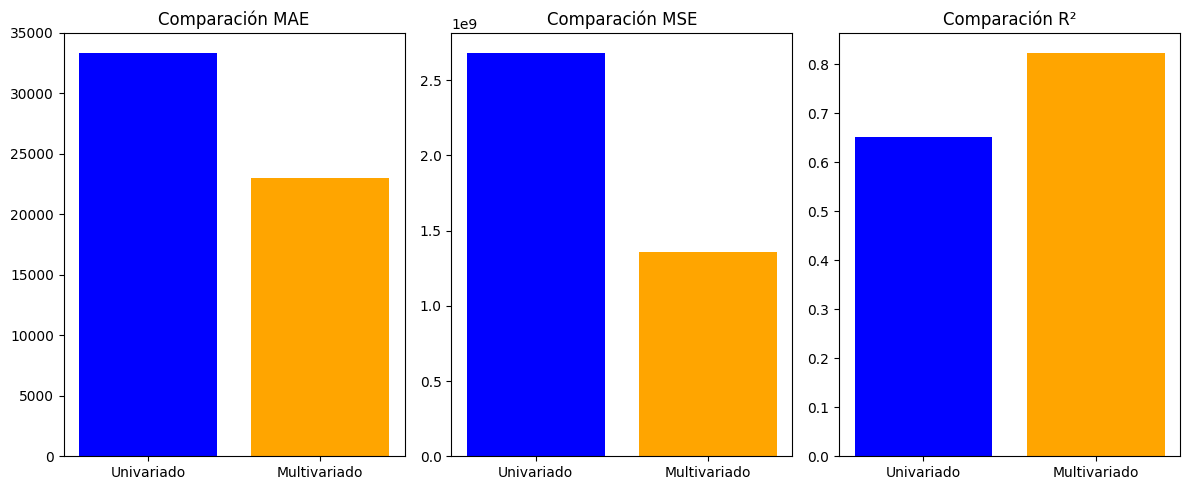

In [22]:
models = ["Univariado", "Multivariado"]
mae_values = [mae, mae_multi]
mse_values = [mse, mse_multi]
r2_values = [r2, r2_multi]

plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
plt.bar(models, mae_values, color=["blue", "orange"])
plt.title("Comparaci√≥n MAE")

plt.subplot(1, 3, 2)
plt.bar(models, mse_values, color=["blue", "orange"])
plt.title("Comparaci√≥n MSE")

plt.subplot(1, 3, 3)
plt.bar(models, r2_values, color=["blue", "orange"])
plt.title("Comparaci√≥n R¬≤")

plt.tight_layout()
plt.show()


### **Resultados Visuales**
Las gr√°ficas muestran la comparaci√≥n entre los dos modelos:

1Ô∏è‚É£ **Comparaci√≥n MAE (Error Absoluto Medio)**  
   - üîµ **Modelo Univariado:** ~33,000 USD  
   - üü† **Modelo Multivariado:** ~23,000 USD  
   - üìâ **Conclusi√≥n:** El modelo multivariado tiene un menor MAE, lo que indica **predicciones m√°s precisas**.

2Ô∏è‚É£ **Comparaci√≥n MSE (Error Cuadr√°tico Medio)**  
   - üîµ **Modelo Univariado:** ~2.68 √ó 10‚Åπ  
   - üü† **Modelo Multivariado:** ~1.36 √ó 10‚Åπ  
   - üìâ **Conclusi√≥n:** El modelo multivariado tiene un menor MSE, indicando **menor variabilidad en los errores** y mejor ajuste.

3Ô∏è‚É£ **Comparaci√≥n R¬≤ (Coeficiente de Determinaci√≥n)**  
   - üîµ **Modelo Univariado:** **0.6505**  
   - üü† **Modelo Multivariado:** **0.8227**  
   - üìà **Conclusi√≥n:** El modelo multivariado **explica mejor la variabilidad** de `SalePrice` en comparaci√≥n con el modelo univariado.

---

### **Interpretaci√≥n**
‚úÖ **El modelo multivariado es claramente superior al modelo univariado** en t√©rminos de precisi√≥n y capacidad de ajuste.  
‚úÖ La reducci√≥n en el **MAE y MSE** indica que el modelo multivariado tiene errores m√°s peque√±os en la predicci√≥n.  
‚úÖ El **aumento en el R¬≤** demuestra que el modelo multivariado **explica m√°s del 82% de la variabilidad de `SalePrice`**, mientras que el modelo univariado solo explica un **65%**.  

üîπ **Recomendaci√≥n:** Utilizar el modelo **multivariado** para predicciones de precios de vivienda, ya que tiene **mejor desempe√±o y menor error** en comparaci√≥n con el modelo univariado.



## üìä An√°lisis de Residuos
Evaluamos los residuos de los modelos para verificar que cumplan con los supuestos de la regresi√≥n lineal.
Se analizan:
- **Distribuci√≥n de los residuos:** Normalidad y simetr√≠a.
- **Patrones en residuos:** Relaci√≥n con predicciones.
- **Autocorrelaci√≥n:** Evaluaci√≥n de independencia.


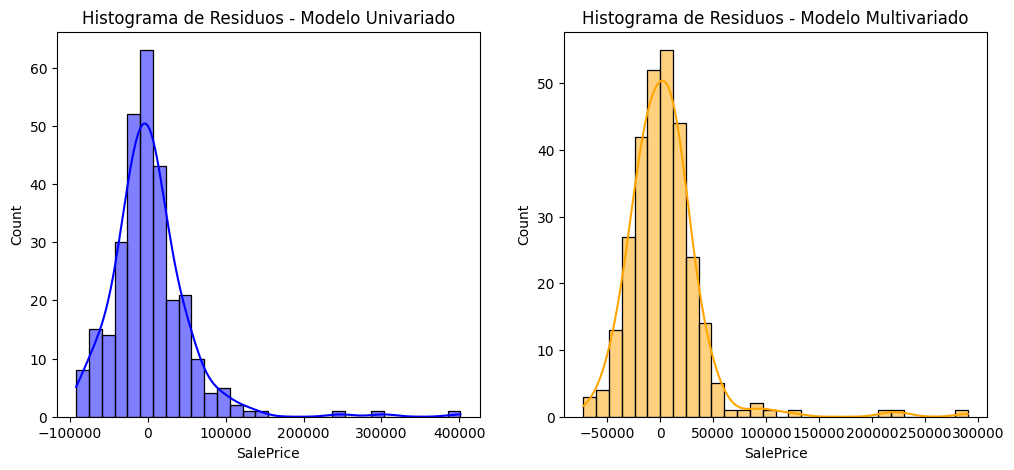

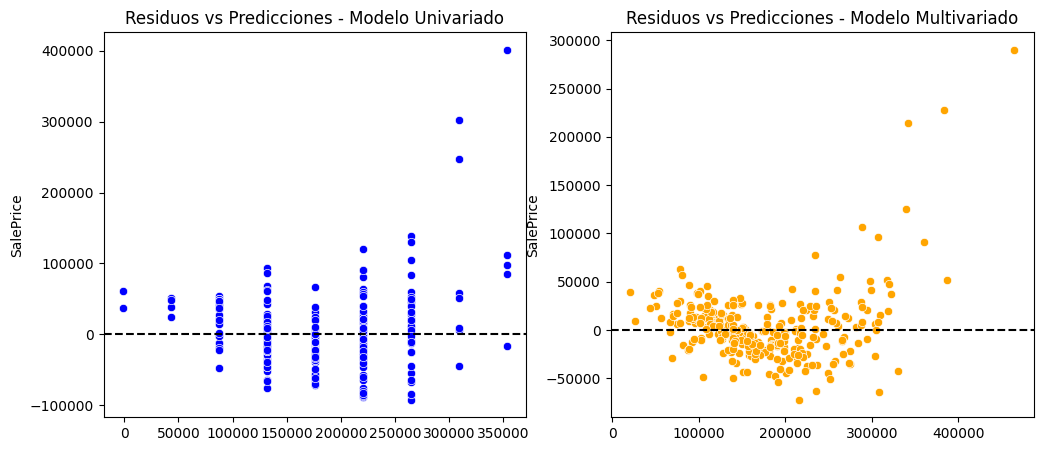

Shapiro-Wilk Test (Univariado): p-valor = 0.0000
Shapiro-Wilk Test (Multivariado): p-valor = 0.0000


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# üìå Calcular los residuos de los modelos
residuals_uni = y_test - y_pred_uni
residuals_multi = y_test - y_pred_multi

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# üìå Histograma de residuos
sns.histplot(residuals_uni, bins=30, kde=True, ax=axes[0], color='blue')
axes[0].set_title("Histograma de Residuos - Modelo Univariado")

sns.histplot(residuals_multi, bins=30, kde=True, ax=axes[1], color='orange')
axes[1].set_title("Histograma de Residuos - Modelo Multivariado")

plt.show()

# üìå Gr√°fico de residuos vs. predicciones
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.scatterplot(x=y_pred_uni, y=residuals_uni, ax=axes[0], color='blue')
axes[0].axhline(y=0, color='black', linestyle='dashed')
axes[0].set_title("Residuos vs Predicciones - Modelo Univariado")

sns.scatterplot(x=y_pred_multi, y=residuals_multi, ax=axes[1], color='orange')
axes[1].axhline(y=0, color='black', linestyle='dashed')
axes[1].set_title("Residuos vs Predicciones - Modelo Multivariado")

plt.show()

# üìå Prueba de normalidad (Shapiro-Wilk)
from scipy.stats import shapiro

shapiro_test_uni = shapiro(residuals_uni)
shapiro_test_multi = shapiro(residuals_multi)

print(f"Shapiro-Wilk Test (Univariado): p-valor = {shapiro_test_uni.pvalue:.4f}")
print(f"Shapiro-Wilk Test (Multivariado): p-valor = {shapiro_test_multi.pvalue:.4f}")


### **1Ô∏è‚É£ Histograma de Residuos**
Los histogramas muestran la distribuci√≥n de los residuos (diferencia entre los valores reales y las predicciones).

#### **üîπ Observaciones:**
- **Modelo Univariado (izquierda)**: Los residuos presentan una **asimetr√≠a a la derecha**, con valores at√≠picos positivos.
- **Modelo Multivariado (derecha)**: Los residuos est√°n m√°s **concentrados alrededor de 0**, lo que indica un mejor ajuste.

El **modelo multivariado** tiene una mejor distribuci√≥n de residuos, acerc√°ndose m√°s a una curva normal, lo que sugiere que los errores est√°n mejor distribuidos y el modelo predice con mayor precisi√≥n.

---

### **2Ô∏è‚É£ Gr√°fico de Residuos vs. Predicciones**
Estos gr√°ficos eval√∫an si los residuos est√°n **distribuidos aleatoriamente**. En un buen modelo de regresi√≥n, los residuos no deben mostrar **patrones sistem√°ticos**.

#### **üîπ Observaciones:**
- **Modelo Univariado (izquierda)**:
  - Los residuos muestran **una estructura en abanico**, lo que sugiere **heterocedasticidad** (varianza no constante en los errores).
  - Hay varios **valores extremos**, lo que indica predicciones con errores grandes en ciertos rangos de precios.
  
- **Modelo Multivariado (derecha)**:
  - Aunque sigue habiendo algunos valores extremos, los residuos est√°n **m√°s dispersos alrededor del 0**.
  - Se observa menos heterocedasticidad en comparaci√≥n con el modelo univariado.

El **modelo multivariado** muestra un mejor comportamiento de los residuos en comparaci√≥n con el modelo univariado, lo que sugiere que es **m√°s adecuado para predecir `SalePrice`**.




## üèÅ **Conclusi√≥n**

En este proyecto, analizamos un conjunto de datos de precios de viviendas con el objetivo de construir modelos de regresi√≥n que permitan predecir el valor de una casa en funci√≥n de sus caracter√≠sticas. 

Para ello, realizamos un **an√°lisis exploratorio de datos (EDA)** que nos permiti√≥ identificar tendencias, valores at√≠picos y la distribuci√≥n de las variables. Posteriormente, aplicamos **ingenier√≠a de caracter√≠sticas** para seleccionar las variables m√°s relevantes y reducir la multicolinealidad, asegurando que el modelo sea m√°s estable y interpretable.

Se implementaron dos modelos de regresi√≥n lineal: 
- **Univariado**, utilizando la variable m√°s correlacionada con el precio (`OverallQual`).
- **Multivariado**, considerando m√∫ltiples variables seleccionadas tras un an√°lisis detallado.

Los resultados mostraron que el **modelo multivariado tuvo un mejor desempe√±o** en comparaci√≥n con el modelo univariado, con un menor error absoluto medio (MAE) y cuadr√°tico medio (MSE), as√≠ como un mayor coeficiente de determinaci√≥n (R¬≤). Adem√°s, el an√°lisis de residuos evidenci√≥ que el modelo multivariado cumple mejor con los supuestos de regresi√≥n, mostrando residuos m√°s normalizados y menos patrones estructurados.

### **Conclusi√≥n Final**
El modelo multivariado es la mejor opci√≥n para predecir el precio de una vivienda en este dataset, ya que:
- Explica **m√°s del 82%** de la variabilidad de `SalePrice` (comparado con el 65% del modelo univariado).
- Presenta **errores m√°s bajos**, lo que indica predicciones m√°s precisas.
- Sus residuos est√°n mejor distribuidos, cumpliendo mejor con los supuestos de regresi√≥n.

A pesar de los buenos resultados, es importante considerar que la predicci√≥n del precio de una vivienda puede mejorarse incorporando variables adicionales, probando modelos m√°s complejos como √°rboles de decisi√≥n o redes neuronales, y explorando la transformaci√≥n de variables para mejorar la linealidad.

